In [11]:
import pandas as pd
import numpy as np
import sqlite3,re,hashlib,datetime
import matplotlib.pyplot as plt

In [12]:
def cDep():#liste des départements existants
    ldep=[]
    for x in range(1,96):
        ldep.append(format(x, '02d'))
    ldep.append(99)
    return ldep

def find_type(text): # tries les annonces: 0 si rien, 1 si appartement, 2 si maison, 3 si terrain
    x=0 #si il n'y a rien dans l'annonce, ce n'est pas classé
    if "terrain" in text:
        x=3
    if "Terrain" in text:
        x=3
    if "Appartement" in text:
        x=1
    if "appartement" in text:
        x=1
    if "Studio" in text:
        x=1
    if "studio" in text:
        x=1
    if "maison" in text:
        x=2
    if "Maison" in text:
        x=2
    if "propriété" in text:
        x=2
    if "Propriété" in text:
        x=2
    return x

def hashmaker(text):
    return hashlib.md5((text).encode('utf-8')).hexdigest()

def surfacefinder(text):
    rex = re.compile(r'.*?,(.*?)m2.*?',re.S|re.M)
    matc = rex.match(str(text))
    if matc:
        return(matc.groups()[0].strip())
    else:
        return("0")

def dptfinder(text):
    return text[0:2]

In [13]:
cnx = sqlite3.connect('1.db')
df1 = pd.read_sql_query("SELECT * FROM data", cnx)
cnx = sqlite3.connect('2.db')
df2 = pd.read_sql_query("SELECT * FROM data", cnx)
cnx = sqlite3.connect('3.db')
df3 = pd.read_sql_query("SELECT * FROM data", cnx)
cnx = sqlite3.connect('4.db')
df4 = pd.read_sql_query("SELECT * FROM data", cnx)
cnx = sqlite3.connect('5.db')
df5 = pd.read_sql_query("SELECT * FROM data", cnx)
cnx = sqlite3.connect('6.db')
df6 = pd.read_sql_query("SELECT * FROM data", cnx)
cnx = sqlite3.connect('7.db')
df7 = pd.read_sql_query("SELECT * FROM data", cnx)
cnx = sqlite3.connect('8.db')
df8 = pd.read_sql_query("SELECT * FROM data", cnx)
df9 = pd.concat([df1, df2,df3,df4,df5,df6,df7,df8])
def hashmaker(text):
    return hashlib.md5((text).encode('utf-8')).hexdigest()
df9['hash2'] = df9['hash']+df9['taux'].apply(hashmaker)
df9.drop_duplicates(subset=['hash2'], keep='first', inplace=True)



conn = sqlite3.connect("ancien.db")
df10 = pd.read_sql_query("select * from data;", conn)
conn = sqlite3.connect("toutf.db")
df11 = pd.read_sql_query("select * from data;", conn)
df12=pd.concat([df10, df11]) 


df=pd.concat([df12, df9]) 

/home/momo327/.local/lib/python3.6/site-packages/ipykernel_launcher.py:32: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



In [14]:
#df = df[df.applymap(np.isreal).any(1)]
#df[pd.to_numeric(df['surface'], errors='coerce').notnull()]
#df=df['surface'].apply(lambda x: pd.to_numeric(x, errors = 'coerce')).dropna()
#df = df['surface'].convert_objects(convert_numeric=True).dropna()
df=df[pd.to_numeric(df['surface'], errors='coerce').notnull()]

In [15]:

df['surface']=df['surface'].astype(float)


In [16]:
#on transforme les colonnes en types exploitables
df['prix']=df['prix'].astype(float)
df['id']=df['id'].astype(float)
df['taux']=df['taux'].astype(float)
df['date'] = df['date'].astype('datetime64[ns]')

#on catégorise l'appart
df['type'] = df['nom'].apply(find_type)

#on fait un hash
df['hash'] = df['lien'].apply(hashmaker)

#on trouve les surfaces
df['surface'] = df['nom'].apply(surfacefinder)

df['surface']=df['surface'].astype(float)
#on trouve les  departements
df['dept'] = df['codepostal'].apply(dptfinder)
df['dept']= df['dept'].astype(str)

df["prixaum"]=df.prix/df.surface


In [17]:
#on choisit le nombre de jours
df=df[df.date > datetime.datetime.now() - pd.to_timedelta("320day")]

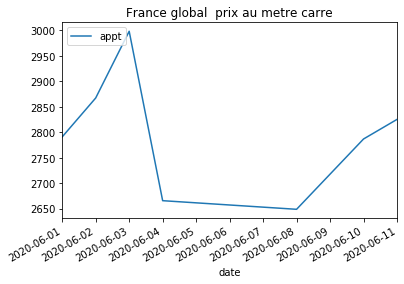

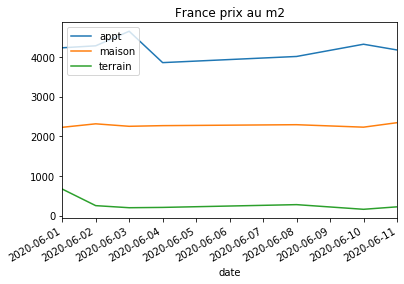

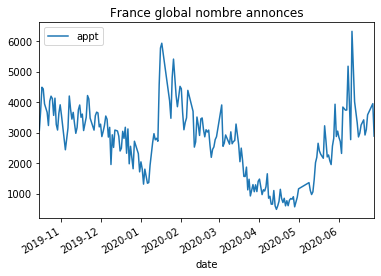

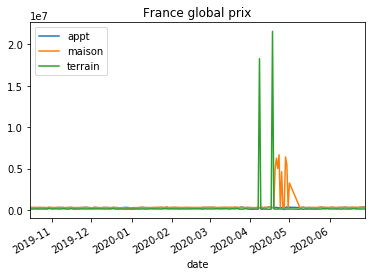

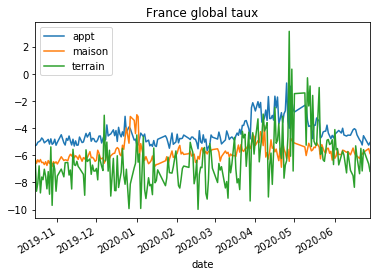

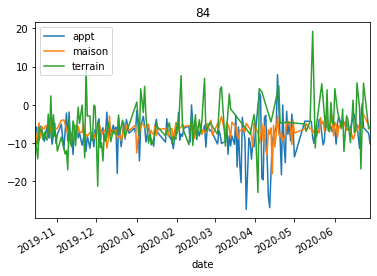

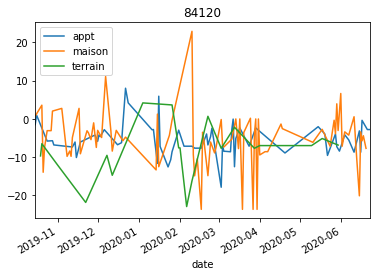

In [18]:
with pd.option_context('mode.use_inf_as_null', True):#on degage  les div par 0
   dff = df.dropna()
try:
    dff.groupby(['date'])['prixaum'].mean().plot()
except:
    pass
plt.legend(['appt', 'maison', 'terrain'], loc='upper left')
plt.title("France global  prix au metre carre")
plt.show()

try:
    test=dff.loc[(dff.type==1)]
    test.groupby(['date'])['prixaum'].mean().plot()
except:
    pass

try:
    test2=dff.loc[(dff.type==2)]
    test2.groupby(['date'])['prixaum'].mean().plot()
except:
    pass

try:
    test3=dff.loc[(dff.type==3)]
    test3.groupby(['date'])['prixaum'].mean().plot()
except:
    pass

plt.legend(['appt', 'maison', 'terrain'], loc='upper left')
plt.title("France prix au m2")
plt.show()


try:
    df.groupby(['date'])['taux'].count().plot()
except:
    pass

plt.legend(['appt', 'maison', 'terrain'], loc='upper left')
plt.title("France global nombre annonces")
plt.show()


try:
    test=df.loc[(df.type==1)]
    #print(test.groupby(['date'])['prix'].mean())
    test.groupby(['date'])['prix'].mean().plot()
except:
    pass

try:
    test2=df.loc[(df.type==2)]
    test2.groupby(['date'])['prix'].mean().plot()
except:
    pass

try:
    test3=df.loc[(df.type==3)]
    test3.groupby(['date'])['prix'].mean().plot()
except:
    pass

plt.legend(['appt', 'maison', 'terrain'], loc='upper left')
plt.title("France global prix")
plt.show()

try:
    test=df.loc[(df.type==1)]
    test.groupby(['date'])['taux'].mean().plot()
except:
    pass

try:
    test2=df.loc[(df.type==2)]
    test2.groupby(['date'])['taux'].mean().plot()
except:
    pass

try:
    test3=df.loc[(df.type==3)]
    test3.groupby(['date'])['taux'].mean().plot()
except:
    pass

plt.legend(['appt', 'maison', 'terrain'], loc='upper left')
plt.title("France global taux")
plt.show()




"""
for i in cDep():
    print(i)

    xxx=i
    try:
        test=df.loc[(df.type==1) & (df.dept==xxx)]
        test.groupby(['date'])['taux'].mean().plot()
    except:
        pass

    try:
        test2=df.loc[(df.type==2) & (df.dept==xxx)]
        test2.groupby(['date'])['taux'].mean().plot()
    except:
        pass

    try:
        test3=df.loc[(df.type==3) & (df.dept==xxx)]
        test3.groupby(['date'])['taux'].mean().plot()
    except:
        pass

    plt.legend(['appt', 'maison', 'terrain'], loc='upper left')
    plt.title(xxx)
    plt.show()

"""


xxx="84"
try:
    test=df.loc[(df.type==1) & (df.dept==xxx)]
    test.groupby(['date'])['taux'].mean().plot()
except:
    pass

try:
    test2=df.loc[(df.type==2) & (df.dept==xxx)]
    test2.groupby(['date'])['taux'].mean().plot()
except:
    pass

try:
    test3=df.loc[(df.type==3) & (df.dept==xxx)]
    test3.groupby(['date'])['taux'].mean().plot()
except:
    pass

plt.legend(['appt', 'maison', 'terrain'], loc='upper left')
plt.title(xxx)
plt.show()

xxx="84120"
try:
    test=df.loc[(df.type==1) & (df.codepostal==xxx)]
    test.groupby(['date'])['taux'].mean().plot()
except:
    pass

try:
    test2=df.loc[(df.type==2) & (df.codepostal==xxx)]
    test2.groupby(['date'])['taux'].mean().plot()
except:
    pass

try:
    test3=df.loc[(df.type==3) & (df.codepostal==xxx)]
    test3.groupby(['date'])['taux'].mean().plot()
except:
    pass

plt.legend(['appt', 'maison', 'terrain'], loc='upper left')
plt.title(xxx)
plt.show()
